# Coded Apertures Calculations

We will begin with the simulation of an experiment.
First we must import some modules.

In [1]:
import CA_calculations_c as cac
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

We will work with an example image. cac.buildob() defines the size of the object, and plots the whole example picture as well as the cutout that is the object itself.

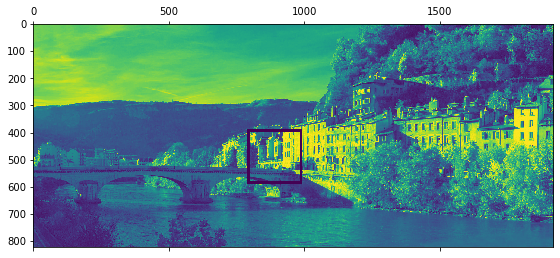

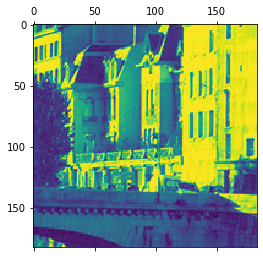

In [5]:
hob = 183
wob = 183
startpixelh = 400
startpixelw = 800
expicture = 'Grenoble'

obj = cac.buildob(h=hob, w=wob, starth=startpixelh, startw=startpixelw, picture='expicture', dim = 0)

Next, we define some parameters for the experiment and the simulation. The calculation of the mstf (transferfunction) can take a while. It contains the distribution of every object pixel in the field of view to every detector pixel.

In [7]:
mask1 = cac.pmmask(5,1,1) #the mask is a mura mask of module 5 with one pixel separation between two hole-pixels

detlength = 264     # detlength in pixel, assumed to be square
detpixsize = 48     # size of a detector pixel in µm
masksize = 1000     # physical size of the mask in µm
maskholesize = 90   # diameter of a hole, assumed to be a circle, in µm
maskthickness = 25  # thickness of the mask
rotation = 0        # rotation of the mask relative to the detector in °
obpixsize = 100     # size of one reconstructed object pixel
d1 = 10             # distance between object and mask
d2 = 6.05           # distance between mask and detector
pcfov = 0           # pcfov = 0 => only the fully coded field of view is considered, pcfov = 1 => the partially 
                    # coded field of view is also considered
norm = 1            # the transferfunction is "normed", so that each hole in the mask adds a total intensity of 1 to the
                    # detector image

mstf1 = cac.buildmatf_for_reconstruction(mask1,detlength,detpixsize,masksize,maskholesize,maskthickness,rotation,
                                         obpixsize,d1,d2,pcfov,norm)

start at:  Thu Feb 18 11:45:32 2021
slope =  3.6
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

computation time:  175.68991994857788


The shape of the mstf is detectorpixel x objectpixel.
As the field of view is defined by the detector size, masksize and the distances d1 and d2, the choice of the objectpixelsize determines the number of object pixels.

In [9]:
print(np.shape(mstf1))

(69696, 33489)


The simulation of the projection is done with cac.sparse_projection(obj, mstf1). The projection is returned as a 1d vector. To plot it, it must be converted into 2d (size = detecotr size).

Time to calculate the projection:  0.033982038497924805  seconds


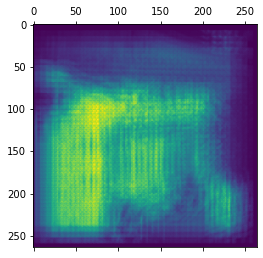

In [11]:
projection = cac.sparse_projection(obj,mstf1)
projection2d = cac.from122(projection,detlength,detlength)
plt.matshow(projection2d)

This projection is the simulated measurement data. Now we can perform the reconstruction. Therefore we need to define a first guess. It has to be a tf Variable of shape [number of objectpixels x 1]. Furthermore, we have to define the maximum number of steps, max_iter, which is set to 500 per default, and the learning rate of the optimizer, which is set to 0.5 per default.
cac.c_sparse takes the 1d projection vector as input!

start at:  Thu Feb 18 12:38:03 2021
0 / 500
tf.Tensor(3.615853e-05, shape=(), dtype=float32)
1 / 500
tf.Tensor(2.2777804e-05, shape=(), dtype=float32)
2 / 500
tf.Tensor(1.2189751e-05, shape=(), dtype=float32)
3 / 500
tf.Tensor(1.2180464e-05, shape=(), dtype=float32)
4 / 500
tf.Tensor(1.5396125e-05, shape=(), dtype=float32)
5 / 500
tf.Tensor(1.6583124e-05, shape=(), dtype=float32)
6 / 500
tf.Tensor(1.543021e-05, shape=(), dtype=float32)
7 / 500
tf.Tensor(1.3235751e-05, shape=(), dtype=float32)
8 / 500
tf.Tensor(1.12705175e-05, shape=(), dtype=float32)
9 / 500
tf.Tensor(1.042688e-05, shape=(), dtype=float32)
10 / 500
tf.Tensor(1.0342507e-05, shape=(), dtype=float32)
11 / 500
tf.Tensor(1.0245576e-05, shape=(), dtype=float32)
12 / 500
tf.Tensor(9.876148e-06, shape=(), dtype=float32)
13 / 500
tf.Tensor(9.235978e-06, shape=(), dtype=float32)
14 / 500
tf.Tensor(8.516318e-06, shape=(), dtype=float32)
15 / 500
tf.Tensor(7.7187515e-06, shape=(), dtype=float32)
16 / 500
tf.Tensor(7.0263677e-06, s

139 / 500
tf.Tensor(3.965272e-07, shape=(), dtype=float32)
140 / 500
tf.Tensor(3.9378241e-07, shape=(), dtype=float32)
141 / 500
tf.Tensor(3.9108514e-07, shape=(), dtype=float32)
142 / 500
tf.Tensor(3.8832738e-07, shape=(), dtype=float32)
143 / 500
tf.Tensor(3.8561228e-07, shape=(), dtype=float32)
144 / 500
tf.Tensor(3.829743e-07, shape=(), dtype=float32)
145 / 500
tf.Tensor(3.8036268e-07, shape=(), dtype=float32)
146 / 500
tf.Tensor(3.7775987e-07, shape=(), dtype=float32)
147 / 500
tf.Tensor(3.7523367e-07, shape=(), dtype=float32)
148 / 500
tf.Tensor(3.727392e-07, shape=(), dtype=float32)
149 / 500
tf.Tensor(3.7022198e-07, shape=(), dtype=float32)
150 / 500
tf.Tensor(3.677447e-07, shape=(), dtype=float32)
151 / 500
tf.Tensor(3.6531904e-07, shape=(), dtype=float32)
152 / 500
tf.Tensor(3.628972e-07, shape=(), dtype=float32)
153 / 500
tf.Tensor(3.6049303e-07, shape=(), dtype=float32)
154 / 500
tf.Tensor(3.5814654e-07, shape=(), dtype=float32)
155 / 500
tf.Tensor(3.558298e-07, shape=(), d

277 / 500
tf.Tensor(1.895994e-07, shape=(), dtype=float32)
278 / 500
tf.Tensor(1.8881367e-07, shape=(), dtype=float32)
279 / 500
tf.Tensor(1.8803323e-07, shape=(), dtype=float32)
280 / 500
tf.Tensor(1.8725795e-07, shape=(), dtype=float32)
281 / 500
tf.Tensor(1.864881e-07, shape=(), dtype=float32)
282 / 500
tf.Tensor(1.8572345e-07, shape=(), dtype=float32)
283 / 500
tf.Tensor(1.8496408e-07, shape=(), dtype=float32)
284 / 500
tf.Tensor(1.8421001e-07, shape=(), dtype=float32)
285 / 500
tf.Tensor(1.8346093e-07, shape=(), dtype=float32)
286 / 500
tf.Tensor(1.82717e-07, shape=(), dtype=float32)
287 / 500
tf.Tensor(1.8197844e-07, shape=(), dtype=float32)
288 / 500
tf.Tensor(1.8124497e-07, shape=(), dtype=float32)
289 / 500
tf.Tensor(1.8051651e-07, shape=(), dtype=float32)
290 / 500
tf.Tensor(1.797928e-07, shape=(), dtype=float32)
291 / 500
tf.Tensor(1.7907387e-07, shape=(), dtype=float32)
292 / 500
tf.Tensor(1.7835981e-07, shape=(), dtype=float32)
293 / 500
tf.Tensor(1.7765065e-07, shape=(), 

414 / 500
tf.Tensor(1.17225206e-07, shape=(), dtype=float32)
415 / 500
tf.Tensor(1.1687437e-07, shape=(), dtype=float32)
416 / 500
tf.Tensor(1.1652535e-07, shape=(), dtype=float32)
417 / 500
tf.Tensor(1.1617809e-07, shape=(), dtype=float32)
418 / 500
tf.Tensor(1.1583243e-07, shape=(), dtype=float32)
419 / 500
tf.Tensor(1.15488305e-07, shape=(), dtype=float32)
420 / 500
tf.Tensor(1.15146086e-07, shape=(), dtype=float32)
421 / 500
tf.Tensor(1.1480534e-07, shape=(), dtype=float32)
422 / 500
tf.Tensor(1.1446667e-07, shape=(), dtype=float32)
423 / 500
tf.Tensor(1.1412926e-07, shape=(), dtype=float32)
424 / 500
tf.Tensor(1.137934e-07, shape=(), dtype=float32)
425 / 500
tf.Tensor(1.1345951e-07, shape=(), dtype=float32)
426 / 500
tf.Tensor(1.1312688e-07, shape=(), dtype=float32)
427 / 500
tf.Tensor(1.1279584e-07, shape=(), dtype=float32)
428 / 500
tf.Tensor(1.1246666e-07, shape=(), dtype=float32)
429 / 500
tf.Tensor(1.1213908e-07, shape=(), dtype=float32)
430 / 500
tf.Tensor(1.1181296e-07, sha

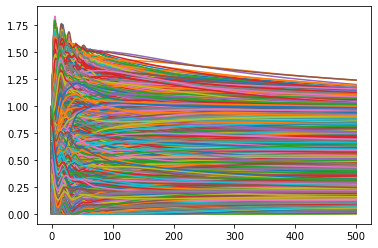

In [16]:
x0 = tf.Variable(tf.random.uniform([np.shape(mstf1)[1],1]))
# x0 = tf.Variable(tf.ones([np.shape(mstf1)[1],1]))
# x0 = tf.Variable(tf.zeros([np.shape(mstf1)[1],1]))
steps = 500
learningrate = 10

reconstruction = cac.c_sparse(projection,mstf1,x0,max_iter=steps,lr=learningrate)

The output of reconstruction is a tuple with entries 
[0] the reconstructed object
[1] the reconstruction time
[2] the development of the difference between projected guess and real data
[3] the development of the pixel values of every pixel of the object guess
[4] the number of steps

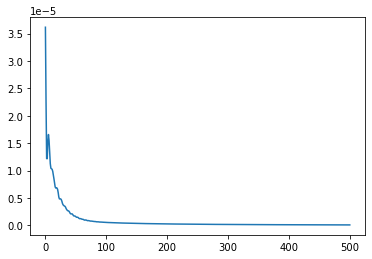

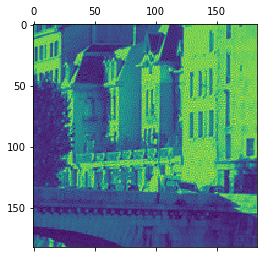

In [17]:
plt.plot(reconstruction[2])
plt.matshow(reconstruction[0])